In [1]:
import PyPDF2
from PyPDF2 import PdfFileReader

import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
import seaborn as sns


import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import sent_tokenize, word_tokenize

import spacy
from spacy.lang.es import Spanish
from spacy.lang.es.stop_words import STOP_WORDS

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import string
import warnings
warnings.filterwarnings("ignore")

In [2]:
def extract_pdf(paths):
    
    all_parties=[]
    for path in paths:
        party_pdf =  open(path, mode='rb')
        party = PyPDF2.PdfFileReader(party_pdf)
        pages = party.getNumPages()
        all_text=[]
        for page in range(pages):
            info=party.getPage(page)
            text=info.extractText()
            text_clean=re.sub('\n', '', text)
            text_clean=re.sub('˜', "fi", text_clean)
            text_clean=re.sub('[-]', "", text_clean)
            text_clean=text_clean.lower()
            #text_clean=re.sub("á", "a", text_clean)
            #text_clean=re.sub("é", "e", text_clean)
            #text_clean=re.sub("í", "i", text_clean)
            #text_clean=re.sub("ó", "o", text_clean)
            #text_clean=re.sub("ú", "u", text_clean)
            all_text.append(text_clean)
        all_parties.append(str(all_text))
        
    return all_parties

In [3]:
path_list=['../data/podemos.pdf','../data/psoe.pdf','../data/ciudadanos.pdf','../data/pp.pdf','../data/vox.pdf']
parties=extract_pdf(path_list)


In [4]:
def df_partido(index, programme):
    df=pd.DataFrame()
    lst=[]
    for row in range((len(programme[index])//700)):
        lst.append(programme[index][row*700:700*(1+row)])
    lst.append([programme[index][700*((len(programme[index])-1)//700):]])
    df['Partido']=[index for i in range((len(programme[index])//700)+1)]
    df['Parrafo']=lst
    return df

podemos=df_partido(0,parties)
psoe=df_partido(1,parties)
ciudadanos=df_partido(2,parties)
pp=df_partido(3,parties)
vox=df_partido(4,parties)
    

data = pd.concat([podemos,psoe,ciudadanos, pp,vox],ignore_index=True)
        
data


,Partido,Parrafo
0,0,"['programa de podemos para un nuevo país', '',..."
1,0,bril hay tres opciones: cualquiera de los tres...
2,0,e le tiemblan las piernas.la tercera opción el...
3,0,da en el centro.este programa que tienes en tu...
4,0,"ribes tú.', 'en este programa se recogen las l..."
5,0,ad científica: o reducimos drásticamente las e...
6,0,"atar el planeta, hablamos también de crear cie..."
7,0,"ía una verdadera revolución productiva y, para..."
8,0,de acceso a ellos las personas afectadas. la ...
9,0,ales de carbón antes del ˚nal de 2025 (y siemp...


In [5]:
party_names=('Podemos','Psoe','Ciudadanos', 'PP','Vox')
party_ids=(0,1,2,3,4) 

In [6]:
def spacy_tokenizer(sentence):
    nlp=spacy.load('es')
    parser = Spanish()
    spacy_stopwords = spacy.lang.es.stop_words.STOP_WORDS
    STOPWORDS=list(spacy_stopwords)
    STOPWORDS.extend(('y','a','u','o','e'))
    tokens = parser(sentence)
    filtered_tokens = []
    for word in tokens:
        lemma = word.lemma_.strip()
        lemma=re.sub("á", "a", lemma)
        lemma=re.sub("é", "e", lemma)
        lemma=re.sub("í", "i", lemma)
        lemma=re.sub("ó", "o", lemma)
        lemma=re.sub("ú", "u", lemma)
        lemma=re.sub("ñ", "n", lemma)
        if lemma not in STOPWORDS and re.search('^[a-zA-Z]+$', lemma):
            filtered_tokens.append(lemma)
    return filtered_tokens

In [7]:
data1=data
data2=data
data3=data
data4=data
data5=data

In [8]:

for i in range(len(data1.Parrafo)):
    data1.Parrafo[i]=str(data1.Parrafo[i])
type(data1.Parrafo[1])

str

In [9]:
data1.Parrafo

0       ['programa de podemos para un nuevo país', '',...
1       bril hay tres opciones: cualquiera de los tres...
2       e le tiemblan las piernas.la tercera opción el...
3       da en el centro.este programa que tienes en tu...
4       ribes tú.', 'en este programa se recogen las l...
5       ad científica: o reducimos drásticamente las e...
6       atar el planeta, hablamos también de crear cie...
7       ía una verdadera revolución productiva y, para...
8        de acceso a ellos las personas afectadas. la ...
9       ales de carbón antes del ˚nal de 2025 (y siemp...
10      cnologías renovables tengan valles, proteger l...
11      con este bien común, vinculado a las grandes o...
12       una nueva cultura del agua, con un gobierno e...
13      usticia social y territorial. a consecuencia d...
14      ión se llevará a cabo colaborando desde el est...
15      las renovables y compensar valles puntuales en...
16      rán redes más eficientes y se priorizará su ca...
17      ón) y 

In [10]:
tfidf_vectorizer = TfidfVectorizer(tokenizer=spacy_tokenizer)
tfidf_matrix = tfidf_vectorizer.fit_transform(data1['Parrafo'])
tfidf_matrix.toarray()
#text_transformed=tfidf_vectorizer.transform(text)

#df['Reviews']=[" ".join(review) for review in df['Reviews'].values]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
print(tfidf_matrix)

  (0, 2030)	0.1752778355837619
  (0, 4322)	0.2844541119823944
  (0, 5834)	0.1636296128733707
  (0, 2609)	0.1442817833325657
  (0, 5583)	0.09175939426856922
  (0, 4432)	0.16999086783882192
  (0, 3513)	0.12541731890034022
  (0, 3497)	0.6110157763910902
  (0, 971)	0.1360908481915935
  (0, 1599)	0.15890520162070326
  (0, 1804)	0.1369195776659959
  (0, 1488)	0.15674382569502757
  (0, 1971)	0.2781457991530471
  (0, 3933)	0.2154096725783889
  (0, 3157)	0.18010092662232963
  (0, 3901)	0.1360908481915935
  (0, 6133)	0.19384519418538299
  (0, 3146)	0.2844541119823944
  (0, 4356)	0.1401349384952263
  (0, 4792)	0.12019414990397298
  (1, 4875)	0.180755285397047
  (1, 1558)	0.11444444998533426
  (1, 729)	0.1538540489925279
  (1, 2630)	0.10193608738265975
  (1, 622)	0.14134568638985337
  :	:
  (1179, 3343)	0.1841483928968208
  (1179, 1143)	0.08704274987107083
  (1179, 3066)	0.0615982789780778
  (1179, 2279)	0.0829789806542675
  (1179, 4511)	0.07239814821320051
  (1179, 3625)	0.12042091345689913
  (11

In [12]:
print(data1.Parrafo)
type(data1.Parrafo[8])

0       ['programa de podemos para un nuevo país', '',...
1       bril hay tres opciones: cualquiera de los tres...
2       e le tiemblan las piernas.la tercera opción el...
3       da en el centro.este programa que tienes en tu...
4       ribes tú.', 'en este programa se recogen las l...
5       ad científica: o reducimos drásticamente las e...
6       atar el planeta, hablamos también de crear cie...
7       ía una verdadera revolución productiva y, para...
8        de acceso a ellos las personas afectadas. la ...
9       ales de carbón antes del ˚nal de 2025 (y siemp...
10      cnologías renovables tengan valles, proteger l...
11      con este bien común, vinculado a las grandes o...
12       una nueva cultura del agua, con un gobierno e...
13      usticia social y territorial. a consecuencia d...
14      ión se llevará a cabo colaborando desde el est...
15      las renovables y compensar valles puntuales en...
16      rán redes más eficientes y se priorizará su ca...
17      ón) y 

str

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

dist = 1 - cosine_similarity(tfidf_matrix)

dist.shape

(1181, 1181)

In [14]:
dist

array([[-2.22044605e-16,  9.73432121e-01,  9.77684241e-01, ...,
         9.85402569e-01,  9.90780058e-01,  1.00000000e+00],
       [ 9.73432121e-01,  0.00000000e+00,  8.77690202e-01, ...,
         9.63523266e-01,  9.98047074e-01,  1.00000000e+00],
       [ 9.77684241e-01,  8.77690202e-01,  0.00000000e+00, ...,
         1.00000000e+00,  9.97795780e-01,  1.00000000e+00],
       ...,
       [ 9.85402569e-01,  9.63523266e-01,  1.00000000e+00, ...,
        -2.22044605e-16,  9.26794851e-01,  9.72688003e-01],
       [ 9.90780058e-01,  9.98047074e-01,  9.97795780e-01, ...,
         9.26794851e-01,  1.11022302e-16,  8.72280838e-01],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         9.72688003e-01,  8.72280838e-01, -2.22044605e-16]])

In [15]:
tfidf_matrix1=tfidf_matrix
dist1=dist
tfidf_matrix2=tfidf_matrix
dist2=dist

In [25]:
from umap import UMAP


umap = UMAP(random_state=42, y=)
embedding2 = umap.fit_transform(dist)

embedding2

array([[ 1.8462185 , -0.4703734 ],
       [ 1.5521554 ,  0.76146865],
       [ 1.5258436 ,  0.64320034],
       ...,
       [ 2.653186  ,  2.1816328 ],
       [ 2.1571229 ,  2.0998883 ],
       [-1.2565817 ,  1.5381862 ]], dtype=float32)

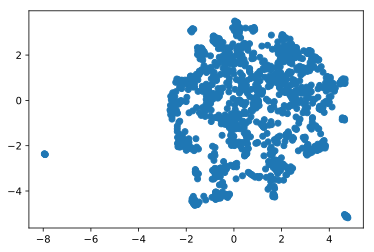

In [26]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

%matplotlib inline
set_matplotlib_formats('svg')

plt.scatter(embedding2[:,0], embedding2[:,1]);

In [18]:
embedding1=embedding

NameError: name 'embedding' is not defined

In [19]:
from sklearn.model_selection import train_test_split

y=data.Partido
x=embedding2

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [20]:
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, accuracy_score

logistic = linear_model.LogisticRegression()
logistic.fit(x_train, y_train)

y_pred_train = logistic.predict(x_train)
print('Accuracy:',sklearn.metrics.accuracy_score(y_train, y_pred_train))
print('COnfusion:', sklearn.metrics.confusion_matrix(y_train, y_pred_train))

y_pred = logistic.predict(x_test)
print('Accuracy:',sklearn.metrics.accuracy_score(y_test, y_pred))
print('COnfusion:', sklearn.metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.5052966101694916
COnfusion: [[  1 217   0   0   0]
 [  5 476   0   0   0]
 [  0  17   0   0   0]
 [  0 203   0   0   0]
 [  0  25   0   0   0]]
Accuracy: 0.4978902953586498
COnfusion: [[  0  53   0   0   0]
 [  1 118   0   0   0]
 [  0   1   0   0   0]
 [  0  61   0   0   0]
 [  0   3   0   0   0]]


In [22]:
x_train.shape

(944, 2)

In [27]:
import nlp

ImportError: No module named 'nlp'